### Previewing Gabor files
feature_creation2.sky_view_gabor, skyview. Creating this took 63 minutes with 4 CPU's and 64 Gb of RAM.


In feature creating 02_All_features_creation_manually_classification_pickels.ipynb the name of function ("def ...") can be located from the feature_creation2..


In [2]:
import dask
print(dask.__version__)


2024.8.0


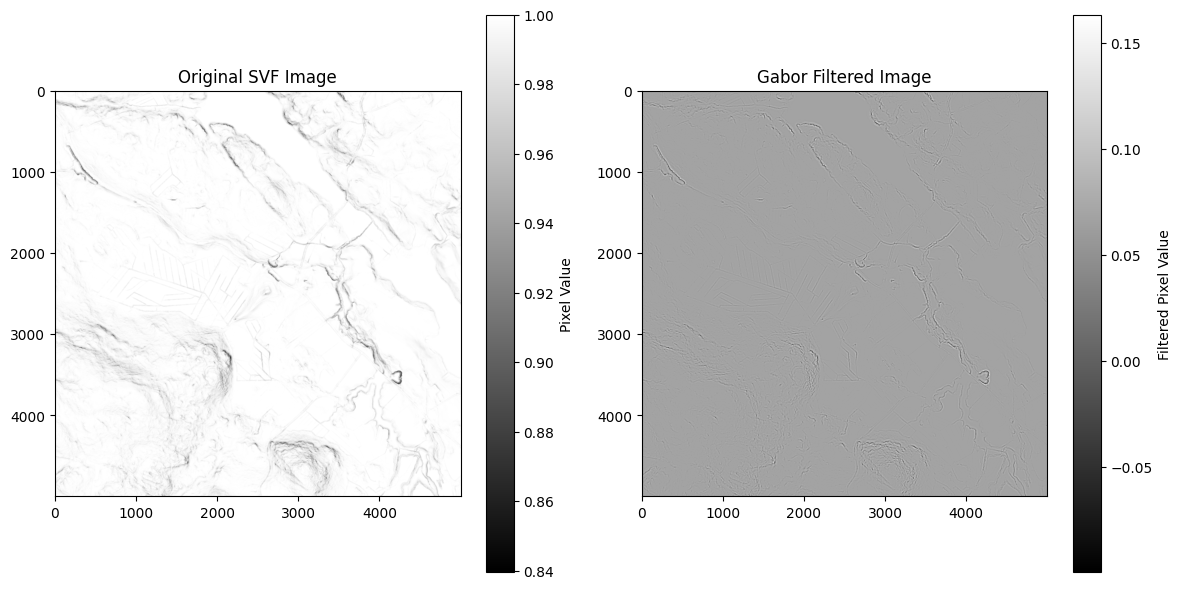

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import dask as dk
from skimage.filters import gabor

@jit(nopython=True)
def _sky_view_gabor(merged, gabors):
    """
    Internal SkyViewFactor merge of Gabor filters.
    """
    for i in range(len(merged)):
        for j in range(len(merged[i])):
            merged[i][j] = 0
    for i in range(len(merged)):
        for j in range(len(merged[i])):
            for k in range(len(gabors)):
                merged[i][j] += gabors[k][i][j]
    return merged

def sky_view_gabor(skyViewArr):
    """
    SkyViewFactor Gabor filter.
    """
    delayed_gabors = []
    for i in np.arange(0.03, 0.08, 0.01):  # Frequencies for the Gabor filter
        for j in np.arange(0, 3, 0.52):   # Orientations for the Gabor filter
            delayed_gabor = dk.delayed(gabor)(skyViewArr, frequency=i, theta=j)[0]
            delayed_gabors.append(delayed_gabor)
    gabors = dk.compute(*delayed_gabors)
    return _sky_view_gabor(skyViewArr.copy(), gabors)

def visualize_gabor(file_path):
    """
    Load the .npy file, apply the Gabor filter, and visualize the result.
    """
    # Load the SVF data from the .npy file
    svf_array = np.load(file_path)
    
    # Apply the SkyView Gabor filter
    gabor_filtered = sky_view_gabor(svf_array)
    
    # Visualize the original and filtered results
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original SVF Image")
    plt.imshow(svf_array, cmap="gray")
    plt.colorbar(label="Pixel Value")
    
    # Gabor Filtered Image
    plt.subplot(1, 2, 2)
    plt.title("Gabor Filtered Image")
    plt.imshow(gabor_filtered, cmap="gray")
    plt.colorbar(label="Filtered Pixel Value")
    
    plt.tight_layout()
    plt.show()

# Run the visualization function
visualize_gabor("E:/Gradu/PurOja/01_Data/01_Raw/features/features/SVF_12.npy")
